### I210503 
### Muhammad Zian Ahmed
### CS A

# Question 1
# Input Image

Image 1 A


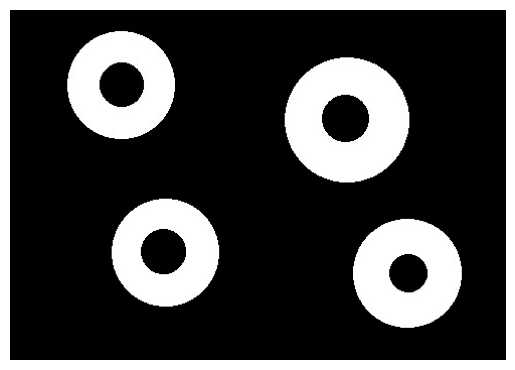

Image 1 B


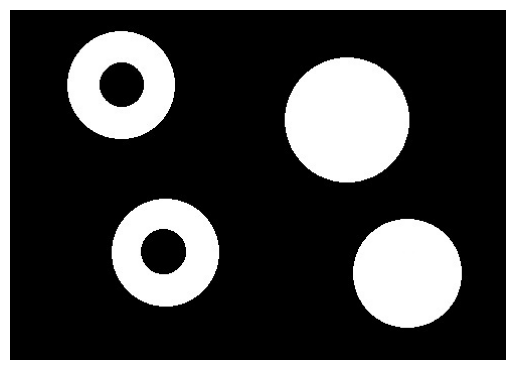

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img1 = cv.imread('Images3/circle3.jpg')
img2 = cv.imread('Images3/circles.jpg')
print("Image 1 A")
plt.imshow(img1)
plt.axis('off')
plt.show()

print("Image 1 B")
plt.imshow(img2)
plt.axis('off')
plt.show()


### Part 1

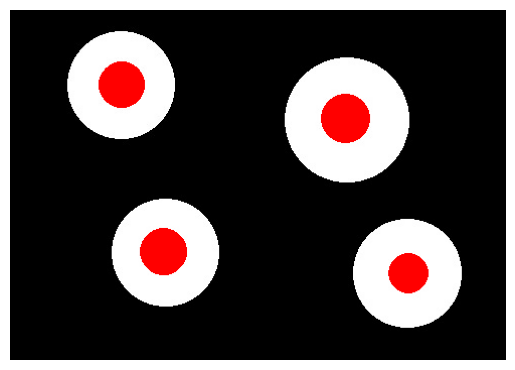

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Images3/circle3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grays = cv2.GaussianBlur(gray, (25, 25), 0)
_, binary = cv2.threshold(grays, 158, 255, cv2.THRESH_BINARY_INV)

label = 1

for i in range(1, binary.shape[0]-1):
    for j in range(1, binary.shape[1]-1):
        if binary[i][j] != 0:
            l1 = binary[i-1][j]
            l2 = binary[i][j-1]
            if not l1 and not l2:
                binary[i][j] = label
                label += 1
            elif l1 and not l2:
                binary[i][j] = l1
            elif l2 and not l1:
                binary[i][j] = l2
            elif l1 and l2:
                binary[i][j] = min(l1, l2)
                if l1 != l2:
                    for m in range(binary.shape[0]):
                        for n in range(binary.shape[1]):
                            if binary[m][n] == l1:
                                binary[m][n] = l2


biggest = 0
biggest_label = 0
for i in range(1, label):
    x, y, w, h = cv2.boundingRect(np.array(binary == i, dtype=np.uint8))
    if w> biggest:
        biggest = w
        biggest_label = i

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if binary[i][j] != biggest_label and binary[i][j] != 0:
            img[i][j] = [255, 0, 0]

plt.imshow(img)
plt.axis('off')
plt.show()


### Part 2

Original Image


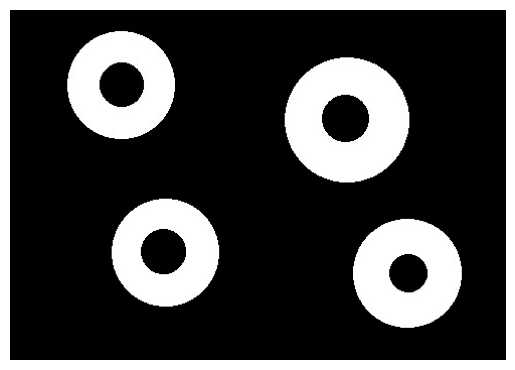

After Dilation Operation


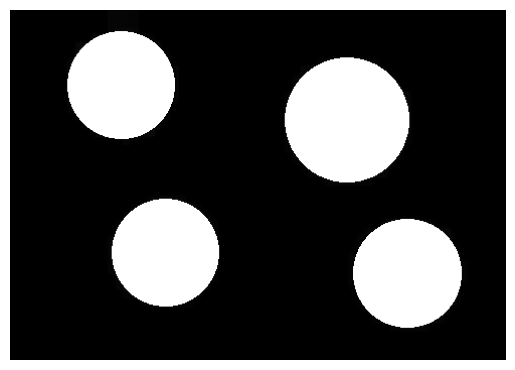

In [3]:
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
kernel = np.ones((35, 35), np.uint8)
closed = cv.morphologyEx(gray, cv.MORPH_CLOSE, kernel)

print("Original Image")
plt.imshow(img1)
plt.axis('off')
plt.show()

print("After Dilation Operation")
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.show()


### Part 3

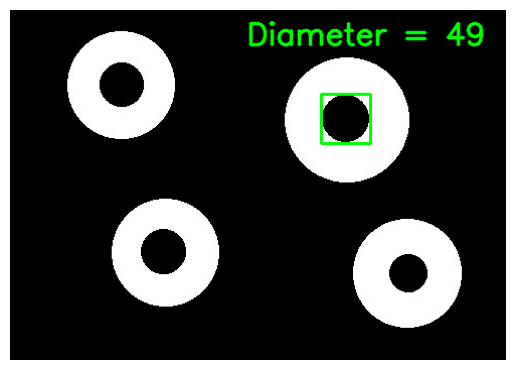

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Images3/circle3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grays = cv2.GaussianBlur(gray, (25, 25), 0)
_, binary = cv2.threshold(grays, 158, 255, cv2.THRESH_BINARY_INV)

label = 1

for i in range(1, binary.shape[0]-1):
    for j in range(1, binary.shape[1]-1):
        if binary[i][j] != 0:
            l1 = binary[i-1][j]
            l2 = binary[i][j-1]
            if not l1 and not l2:
                binary[i][j] = label
                label += 1
            elif l1 and not l2:
                binary[i][j] = l1
            elif l2 and not l1:
                binary[i][j] = l2
            elif l1 and l2:
                binary[i][j] = min(l1, l2)
                if l1 != l2:
                    for m in range(binary.shape[0]):
                        for n in range(binary.shape[1]):
                            if binary[m][n] == l1:
                                binary[m][n] = l2


biggest = 0
biggest_label = 0
for i in range(1, label):
    x, y, w, h = cv2.boundingRect(np.array(binary == i, dtype=np.uint8))
    if h > img.shape[1]/3:
        continue

    if w> biggest:
        biggest = w
        biggest_label = i

x, y, w, h = cv2.boundingRect(np.array(binary == biggest_label, dtype=np.uint8))
d = f'Diameter = {w}'
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0) 
thickness = 2

cv2.putText(img, d, (x-w-25, y-h), font, font_scale, font_color, thickness, cv2.LINE_AA)
plt.imshow(img)
plt.axis('off')
plt.show()


### Part 4

Objects with Holes: 2 	 Objects without Holes: 2


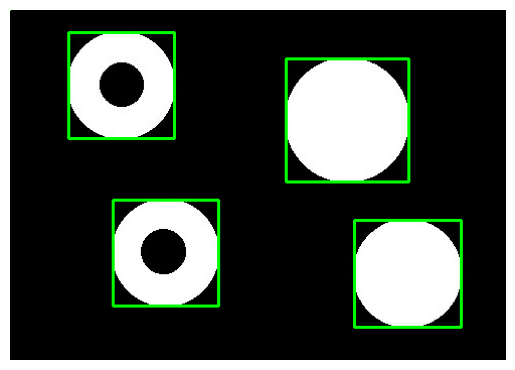

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Images3/circles.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grays = cv2.GaussianBlur(gray, (25, 25), 0)
_, binary = cv2.threshold(grays, 158, 255, cv2.THRESH_BINARY)
_,inv = cv2.threshold(grays, 158, 255, cv2.THRESH_BINARY_INV)

label1 = 1
true_labels1=0
label2 = 1
true_labels2=0

for i in range(1, binary.shape[0]-1):
    for j in range(1, binary.shape[1]-1):
        if binary[i][j] != 0:
            l1 = binary[i-1][j]
            l2 = binary[i][j-1]
            if not l1 and not l2:
                binary[i][j] = label1
                label1 += 1
                true_labels1+=1
            elif l1 and not l2:
                binary[i][j] = l1
            elif l2 and not l1:
                binary[i][j] = l2
            elif l1 and l2:
                binary[i][j] = min(l1, l2)
                if l1 != l2:
                    true_labels1-=1
                    for m in range(binary.shape[0]):
                        for n in range(binary.shape[1]):
                            if binary[m][n] == l1:
                                binary[m][n] = l2
        
        if inv[i][j] != 0:
            l1 = inv[i-1][j]
            l2 = inv[i][j-1]
            if not l1 and not l2:
                inv[i][j] = label2
                label2 += 1
                true_labels2+=1
            elif l1 and not l2:
                inv[i][j] = l1
            elif l2 and not l1:
                inv[i][j] = l2
            elif l1 and l2:
                inv[i][j] = min(l1, l2)
                if l1 != l2:
                    true_labels2-=1
                    for m in range(binary.shape[0]):
                        for n in range(binary.shape[1]):
                            if inv[m][n] == l1:
                                inv[m][n] = l2

        
biggest = 0
biggest_label = 0

for i in range(1, label2):
    x, y, w, h = cv2.boundingRect(np.array(binary == i, dtype=np.uint8))
    if w > img.shape[1]/3:
        continue
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

for i in range(1, label1):
    x, y, w, h = cv2.boundingRect(np.array(binary == i, dtype=np.uint8))
    if w > img.shape[1]/3:
        continue
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


print(f'Objects with Holes: {true_labels2} \t Objects without Holes: {true_labels1 - true_labels2}')

plt.imshow(img)
plt.axis('off')
plt.show()


# Question 2
 Method Used: 
<br>    --Smoothen image using Gaussian Blur with kernel (25,25)
<br>    --Binary threshholding with threshhold 158
<br>    --CC Finding using K means clustering
# Input Image

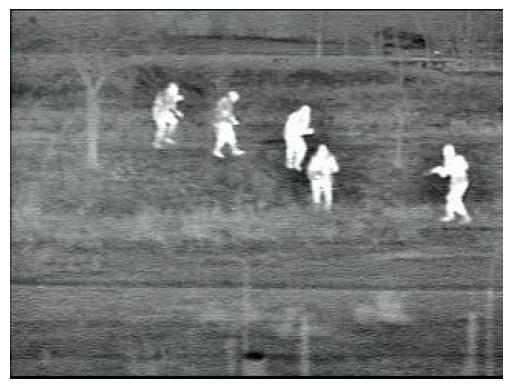

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images3/thermal.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Code & Output Image

Number of Persons:  5


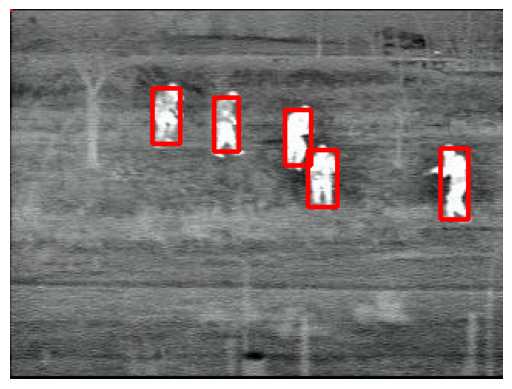

In [7]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grays = cv2.GaussianBlur(gray, (25, 25), 0)
_, binary = cv2.threshold(grays, 158, 255, cv2.THRESH_BINARY)

label = 1

for i in range(1, binary.shape[0]-1):
    for j in range(1, binary.shape[1]-1):
        if binary[i][j] != 0:
            l1 = binary[i-1][j]
            l2 = binary[i][j-1]
            if not l1 and not l2:
                binary[i][j] = label
                label += 1
            elif l1 and not l2:
                binary[i][j] = l1
            elif l2 and not l1:
                binary[i][j] = l2
            elif l1 and l2:
                binary[i][j] = min(l1, l2)
                if l1 != l2:
                    for m in range(binary.shape[0]):
                        for n in range(binary.shape[1]):
                            if binary[m][n] == l1:
                                binary[m][n] = l2

for i in range(1, label):
    x, y, w, h = cv2.boundingRect(np.array(binary == i, dtype=np.uint8))
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


label= len(np.unique(binary))
plt.imshow(img)
print('Number of Persons: ',label-1)
plt.axis('off')
plt.show()


# Question 3

### Method Used: 
<br> - Smoothen image using Gaussian Blur with kernel (11,11)
<br>    - Binary threshholding with threshhold 245
<br>    - Morphological Processing to enhance grid lines
<br>    - Finding contours
<br>    - Filling Empty contours 
# Input Image

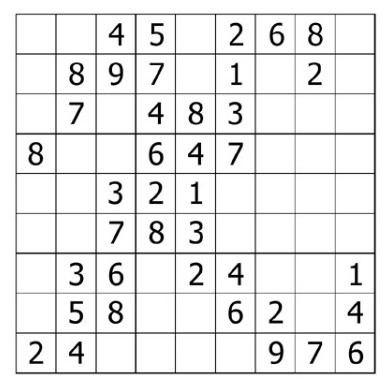

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images3/soduku.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Code & Output Image

82


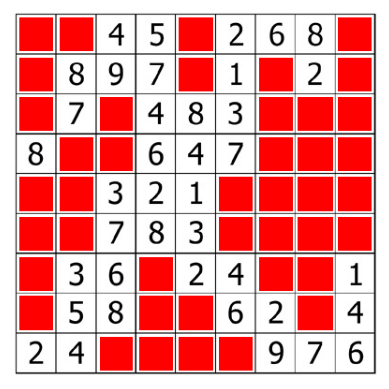

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11, 11), 0)
_, binary = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
smallest_contour = min(contours, key=cv2.contourArea)
print(len(contours))
for contour in contours:
    if contour is largest_contour:
        continue
    x, y, w, h = cv2.boundingRect(contour)
    if np.any(img[y:y+h, x:x+w] == 0):
        continue
    
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), cv2.FILLED)

plt.imshow(img)
plt.axis('off')
plt.show()


# Question 4
# Input Image

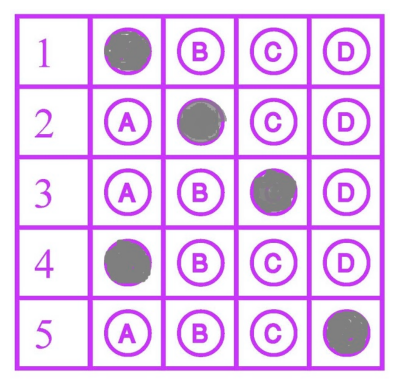

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images3/bubble.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Code & Output Image

#### Pre Processing to the image using Morphological Operations to eliminate alphabets from the grid 
<br>    - Smoothen image using Gaussian Blur with kernel (15,15)
<br>    - Binary threshholding with threshhold 220
<br>    - Closing with with Filter(25,25)
<br>    - Opening with filter(10,10) 


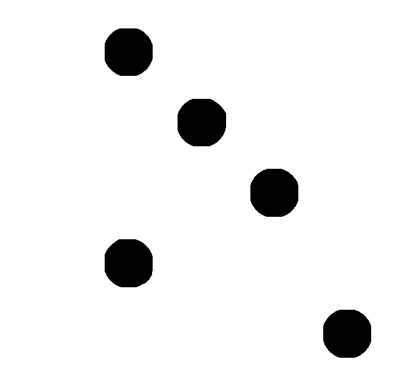

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Images3/bubble.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (15, 15), 0)

_, binary = cv2.threshold(blur, 220, 255, cv2.THRESH_BINARY)

kernel_close = np.ones((25, 25), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_close)

kernel_open = np.ones((10, 10), np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel_open)
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.show()


#### Checking answers using Contours 
<br>    - Smoothen image using Gaussian Blur with kernel (15,15)
<br>    - Binary threshholding with threshhold 252
<br>    - Closing with with Filter(15,15)
<br>    - Finding counters with area greater than 1500
<br>    - Filtering counters by checking ratio of black pixels to white using preprocessed image



Q 1 : A
Q 2 : B
Q 3 : C
Q 4 : A
Q 5 : D


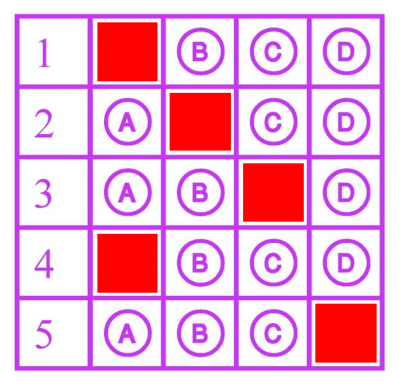

In [12]:
img = cv2.imread('Images3/bubble.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (15, 15), 0)
_, binary = cv2.threshold(blur, 253, 255, cv2.THRESH_BINARY)
kernel = np.ones((15, 15), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_area = 1500
correct = [contour for contour in contours if cv2.contourArea(contour) > min_area]
filtered = []
for i,contour in enumerate(correct):

    x, y, w, h = cv2.boundingRect(contour)
    if h > img.shape[0]/2 or w > img.shape[1]/2:
        continue
    #cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), cv2.FILLED)
    filtered.append(contour)

key1 = {
    1:'A'
    ,2:'B'
    ,3:'C'
    ,4:'D'
}

ans = dict()

for i in range(5):
    for j in range(0,4):
        x, y, w, h = cv2.boundingRect(filtered[(i*5)+j])
        black = cv2.countNonZero(opening[y:y+h, x:x+w])
        white = (w*h) - black

        if white > black:
            ans[(4-i)+1] = key1[(3-j)+1]
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), cv2.FILLED)
            break


for i in range(1,6):
    print('Q',i,':',ans[i])

plt.imshow(img)
plt.axis('off')
plt.show()
